In [2]:
import pandas as pd
from sklearn import datasets

# 大綱
  1. 平均數
  2. 中位數
  3. 眾數
  4. 四分位數
  5. 變異數 & 標準差
  6. 相似度

In [3]:
data = datasets.load_iris()
iris = pd.DataFrame(data['data'], columns = data['feature_names'])
iris.loc[:, 'label'] = data['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 1. 平均數

In [4]:
print(iris.iloc[:, 0:4].mean())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


# 2. 中位數

In [5]:
print(iris.iloc[:, 0:4].median())

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


# 3. 眾數
先轉換成整數再求眾數

In [6]:
iris_Mode = iris.copy(deep=False)
columns = iris_Mode.keys()[:4]

iris_Mode[columns] = iris_Mode[columns].astype('int')

iris_Mode.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5,3,1,0,0
1,4,3,1,0,0
2,4,3,1,0,0
3,4,3,1,0,0
4,5,3,1,0,0


# 4. 四分位數

In [7]:
iris_Quan = iris.iloc[:, 0:4]
iris_Quan.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
q1 = iris_Quan.quantile(.25)
q3 = iris_Quan.quantile(.75)
IQR = q3 - q1

print(IQR)

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
dtype: float64


In [9]:
outliers = iris_Quan[((iris_Quan < (q1 - 1.5*IQR)) | (iris_Quan > (q3 + 1.5*IQR)))]
outliers.count()

sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64

# 5. 變異數 & 標準差

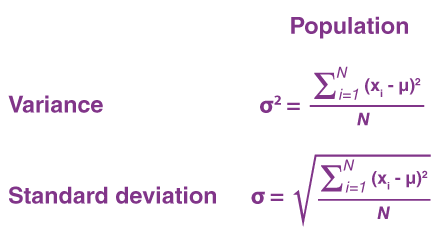

In [10]:
variance = iris.iloc[:, 0:4].var()
std = iris.iloc[:, 0:4].std()

print('variance: ', variance, '\n')
print('standard deviation: ', std, '\n')

print('variance == standard deviation**2 ?')
print(variance == (std**2))

variance:  sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64 

standard deviation:  sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64 

variance == standard deviation**2 ?
sepal length (cm)     True
sepal width (cm)      True
petal length (cm)     True
petal width (cm)     False
dtype: bool


## 6. 相似度
  * Correlation Cofficient
  * Covariance
  * Cosine Similarity

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
#Z-score Standardize
#怕被outliers影響 所以不用min-max normalize
iris_0 = iris.copy()
#最後一個columns是label 所以去掉
for i in iris_0.columns[:-1]:
    iris_0[i] = (iris_0[i] - iris_0[i].mean()) / iris_0[i].std()

iris_0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,-0.897674,1.015602,-1.335752,-1.311052,0
1,-1.139200,-0.131539,-1.335752,-1.311052,0
2,-1.380727,0.327318,-1.392399,-1.311052,0
3,-1.501490,0.097889,-1.279104,-1.311052,0
4,-1.018437,1.245030,-1.335752,-1.311052,0


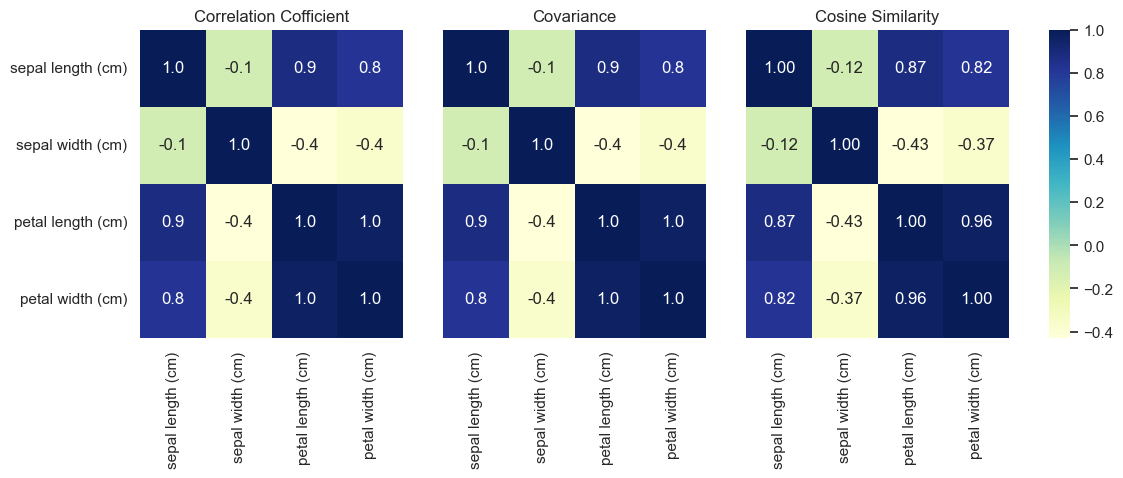

In [49]:
fig, ax = plt.subplots(1, 4, 
                       gridspec_kw={'width_ratios':[1, 1, 1, 0.08]},
                       figsize=(12, 4)
                       )

corr = iris_0.iloc[:, :-1].corr()

ax_0 = sns.heatmap(corr, annot=True, cmap = 'YlGnBu', fmt=".1f", cbar=False, ax=ax[0])
ax_0.set_title('Correlation Cofficient')

cov = iris_0.iloc[:, :-1].cov()

ax_1 = sns.heatmap(cov, annot=True, cmap = 'YlGnBu', fmt=".1f", cbar=False, ax=ax[1])
ax_1.set_yticklabels([])
ax_1.set_title('Covariance')

iris_1 = iris_0.iloc[:, :-1].transpose()
sim = cosine_similarity(iris_1)

ax_2 = sns.heatmap(sim, annot=True, cmap = 'YlGnBu', fmt=".2f", ax=ax[2], cbar_ax=ax[3])
ax_2.set_yticklabels([])
ax_2.set_xticklabels(iris_0.columns[:-1], rotation=90)
ax_2.set_title('Cosine Similarity')

plt.show()